In [66]:
import sys, os
import numpy as np

from matplotlib import pyplot as plt

import h5py
sys.path.append('/Users/ajc/Core/PreProcessing/PyScript')
import readdata as rd

import matplotlib

import matplotlib.pylab as pylab
"""
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
"""

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [71]:
Colors = ['k','c','b','grey','r']
marks=['solid','dashed','-.','dotted']
marks = ['solid','solid','solid','solid','dashed']

In [19]:
path ='/Users/ajc/FUSE/production/stream_hz/SIM_01/'

Simulations =['CA_dx10000m','CA_dx1000m',  'CA_dx500m', 'CA_dx100m','CA_dx50m']

In [4]:
def get_data(file,Tc='Tracer'):
    C_data = rd.GetSurfVarFromVis(file,'surface-total_component_concentration',cellid=0,suffix='.cell.%s'%Tc)
    Concentration = C_data['surface-total_component_concentration']
    return Concentration



In [72]:
def get_discharge_fromVis():
    fig, axs = plt.subplots(1,1, figsize=(6,3.5), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
    fig.subplots_adjust(hspace =.02, wspace=1.02)
    plt.tight_layout()

    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    Labels = ['stream length', '1000 m', '500 m', '100 m', '50 m']

    for i,sim in enumerate(Simulations):
        file = os.path.join(path,sim,'visdump_surface_data.h5')

        dat = get_data(file,'Tracer1')
        data = [c for c in dat]
        time = [t*120/3600 for t in range(len(data))]
        axs.plot(time,data,color=Colors[i], linestyle=marks[i],label = Labels[i])

        axs.set_xlabel('Time [hr]', fontsize=12,fontweight='normal')
        
        axs.set_xlim(0,12)
        axs.set_ylim(0,2e-2)
        axs.set_yticks(np.linspace(0,2e-2,3))
        #axs.set_yticklabels(np.linspace(0,2e-2,3))
        axs.ticklabel_format(style='sci', axis='y', scilimits=(0,0),useMathText=True)
    axs.set_ylabel('Concentration [kg/m$^3$]', fontsize=12,fontweight='normal')

    plt.legend(loc='best',fontsize=10)
    plt.tight_layout()
    outfile='/Users/ajc/Core/PostProcessing/2020/StreamHyporheic/'
    plt.savefig(outfile + 'mesh_sensitivity.png',dpi=300)

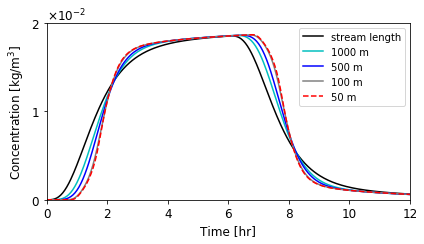

In [73]:
get_discharge_fromVis()

array([0, 0, 0], dtype=int32)